7章

以下のサイトを参考にコードを記述。

https://mori-memo.hateblo.jp/archive/category/%E8%A8%80%E8%AA%9E%E5%87%A6%E7%90%86100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF

#60.
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('drive/MyDrive/100knock/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
print(model['United_States'].shape)
# print(model['United_States'][0])
# print(model['United_States'][1])
# print(model['United_States'][2])
# print(model['United_States'][3])
# print(model['United_States'][4])
# print()
print(model['United_States'])

(300,)
[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -

https://radimrehurek.com/gensim/models/word2vec.html#usage-examples

#61.
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [ ]:
print(model.similarity('United_States', 'U.S.'))

0.73107743


#62.
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
words = model.most_similar('United_States', topn=10)
for word in words:
    print('{}\t{}'.format(word[0], word[1]))

Unites_States	0.7877248525619507
Untied_States	0.7541370987892151
United_Sates	0.7400724291801453
U.S.	0.7310774326324463
theUnited_States	0.6404393911361694
America	0.6178410053253174
UnitedStates	0.6167312264442444
Europe	0.6132988929748535
countries	0.6044804453849792
Canada	0.601906955242157


#63.
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

Spain:スペイン(国名)
Madrid:スペインの首都
Athens:ギリシャの首都

In [ ]:
words = model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)
for word in words:
    print('{}\t{}'.format(word[0], word[1]))

Greece	0.6898480653762817
Aristeidis_Grigoriadis	0.560684859752655
Ioannis_Drymonakos	0.5552908778190613
Greeks	0.545068621635437
Ioannis_Christou	0.5400862097740173
Hrysopiyi_Devetzi	0.5248445272445679
Heraklio	0.5207759737968445
Athens_Greece	0.516880989074707
Lithuania	0.5166865587234497
Iraklion	0.5146791338920593


#64.
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
from tqdm import tqdm
input = 'drive/MyDrive/100knock/questions-words-small.txt'
output = './questions-words_similarity-small.txt'

# tqdm用のtotal数を先に調べておく
total = 0
with open(input, 'r', encoding='utf-8') as f:
    for row in f:
        total += 1

category = ''
with open(input, 'r', encoding='utf-8') as f1, \
        open(output, 'w', encoding='utf-8') as f2:
    for row in tqdm(f1, total=total):
        if row.startswith(':'):
            category = row.rstrip()[2:]
            #rstrip()引数なしで右の空白、改行を削除。
            #末尾の改行を削除するために用いている
            continue
        else:
            cols = row.rstrip().split()
            word, similarity = model.most_similar(positive=[cols[1], cols[2]], negative=[cols[0]], topn=1)[0]
            f2.write('{}\t{}\t{}\t{}\n'.format(category, row.rstrip(), word, similarity))

100%|██████████| 236/236 [02:17<00:00,  1.72it/s]


#65.
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
sem_cnt = 0
sem_true = 0
syn_cnt = 0
syn_true = 0
file = 'drive/MyDrive/100knock/questions-words_similarity.txt'
with open(file, 'r', encoding='utf-8') as f:
    for row in f:
        cols = row.strip().split('\t')
        target = cols[1].split()[-1]
        pred = cols[2]
        if not cols[0].startswith('gram'):
            sem_cnt += 1
            if target == pred:
                sem_true += 1
        else:
            syn_cnt += 1
            if target == pred:
                syn_true += 1
if(sem_cnt*syn_cnt!=0):
    print('意味的アナロジーの正解率: {}'.format(sem_true / sem_cnt))
    print('文法的アナロジーの正解率: {}'.format(syn_true / syn_cnt))

意味的アナロジーの正解率: 0.7308602999210734
文法的アナロジーの正解率: 0.7400468384074942


#66.
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

数値の相関係数ではなく、各変数の順位同士で相関係数を取ることで単調性を数値化できる

In [ ]:
from scipy.stats import spearmanr

file = 'drive/MyDrive/100knock/combined.csv'
human = []
w2v = []
with open(file, 'r', encoding='utf-8') as f:
    next(f)
    for row in f:
        cols = row.rstrip().split(',')
        human.append(float(cols[2])/10)
        w2v.append(model.similarity(cols[0], cols[1]))

correlation, pvalue = spearmanr(human, w2v)

print('スピアマン相関係数: {}'.format(correlation))

スピアマン相関係数: 0.7000166486272194


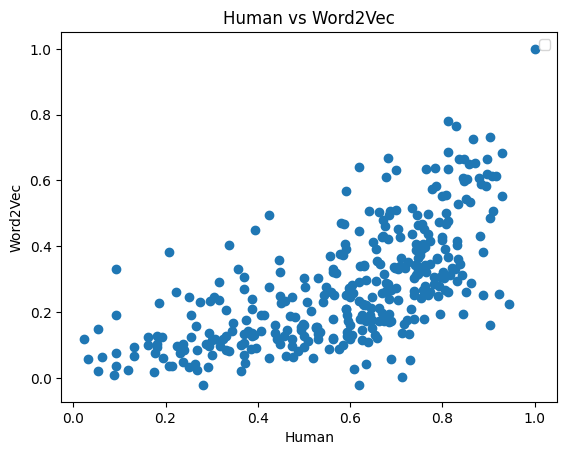

In [ ]:
# グラフのプロット
plt.scatter(human, w2v)
plt.xlabel('Human')
plt.ylabel('Word2Vec')
plt.title('Human vs Word2Vec')
plt.legend()
plt.show()

#67.
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [ ]:
# 単語の取得
file = 'drive/MyDrive/100knock/questions-words_similarity.txt'
categories1 = ['capital-common-countries', 'capital-world']
categories2 = ['currency', 'gram6-nationality-adjective']
countries = set()
with open(file, 'r', encoding='utf-8') as f:
    for row in f:
        cols = row.strip().split('\t')
        if cols[0] in categories1:
            country = cols[1].split()[1]
            countries.add(country)
        elif cols[0] in categories2:
            country = cols[1].split()[0]
            countries.add(country)
        else:
            continue
countries = list(countries)
print(len(countries))
print(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

129
['Belarus', 'Lithuania', 'Armenia', 'Syria', 'Pakistan', 'Argentina', 'Liechtenstein', 'Zimbabwe', 'Kenya', 'Morocco', 'Uganda', 'Iraq', 'Mozambique', 'Philippines', 'Uruguay', 'Indonesia', 'Tajikistan', 'Zambia', 'Switzerland', 'England', 'Iran', 'Burundi', 'Thailand', 'Peru', 'Taiwan', 'Austria', 'France', 'Qatar', 'Greece', 'Croatia', 'Sweden', 'Italy', 'Estonia', 'Cuba', 'Denmark', 'Mali', 'Jamaica', 'Spain', 'Laos', 'Ecuador', 'Israel', 'Oman', 'Brazil', 'Kyrgyzstan', 'Dominica', 'Slovakia', 'Chile', 'Canada', 'Cambodia', 'Nicaragua', 'Bahamas', 'Algeria', 'Ireland', 'Liberia', 'Montenegro', 'Bulgaria', 'Libya', 'Japan', 'Eritrea', 'Nepal', 'Angola', 'Slovenia', 'Belize', 'Poland', 'Vietnam', 'Namibia', 'Belgium', 'Colombia', 'Albania', 'Gabon', 'Portugal', 'Turkmenistan', 'Malaysia', 'Jordan', 'Serbia', 'Bangladesh', 'Bahrain', 'Venezuela', 'USA', 'Honduras', 'Fiji', 'Norway', 'Tuvalu', 'Mexico', 'Madagascar', 'Hungary', 'Kazakhstan', 'Moldova', 'Latvia', 'China', 'Egypt', 'R

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# k-meansクラスタリング
# 最初にランダムにk個の集合に振り分ける。「各kで重心計算->最も重心に近い領域に振り分け直す」を繰り返す。
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster 0
Syria, Pakistan, Morocco, Iraq, Indonesia, Tajikistan, Iran, Thailand, Taiwan, Qatar, Laos, Israel, Oman, Kyrgyzstan, Cambodia, Libya, Japan, Nepal, Vietnam, Turkmenistan, Malaysia, Jordan, Bangladesh, Bahrain, China, Egypt, Lebanon, Bhutan, Turkey, India, Afghanistan, Korea, Uzbekistan
cluster 1
Belarus, Lithuania, Armenia, Greece, Croatia, Estonia, Slovakia, Montenegro, Bulgaria, Slovenia, Poland, Albania, Serbia, Hungary, Kazakhstan, Moldova, Latvia, Romania, Cyprus, Georgia, Azerbaijan, Russia, Malta, Ukraine, Macedonia
cluster 2
Argentina, Philippines, Uruguay, Peru, Cuba, Jamaica, Ecuador, Brazil, Dominica, Chile, Nicaragua, Bahamas, Belize, Colombia, Venezuela, Honduras, Fiji, Tuvalu, Mexico, Suriname, Samoa, Guyana
cluster 3
Zimbabwe, Kenya, Uganda, Mozambique, Zambia, Burundi, Mali, Algeria, Liberia, Eritrea, Angola, Namibia, Gabon, Madagascar, Botswana, Malawi, Rwanda, Ghana, Gambia, Sudan, Nigeria, Guinea, Somalia, Niger, Senegal, Tunisia, Mauritania
cluster 4
Liec

#68.
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

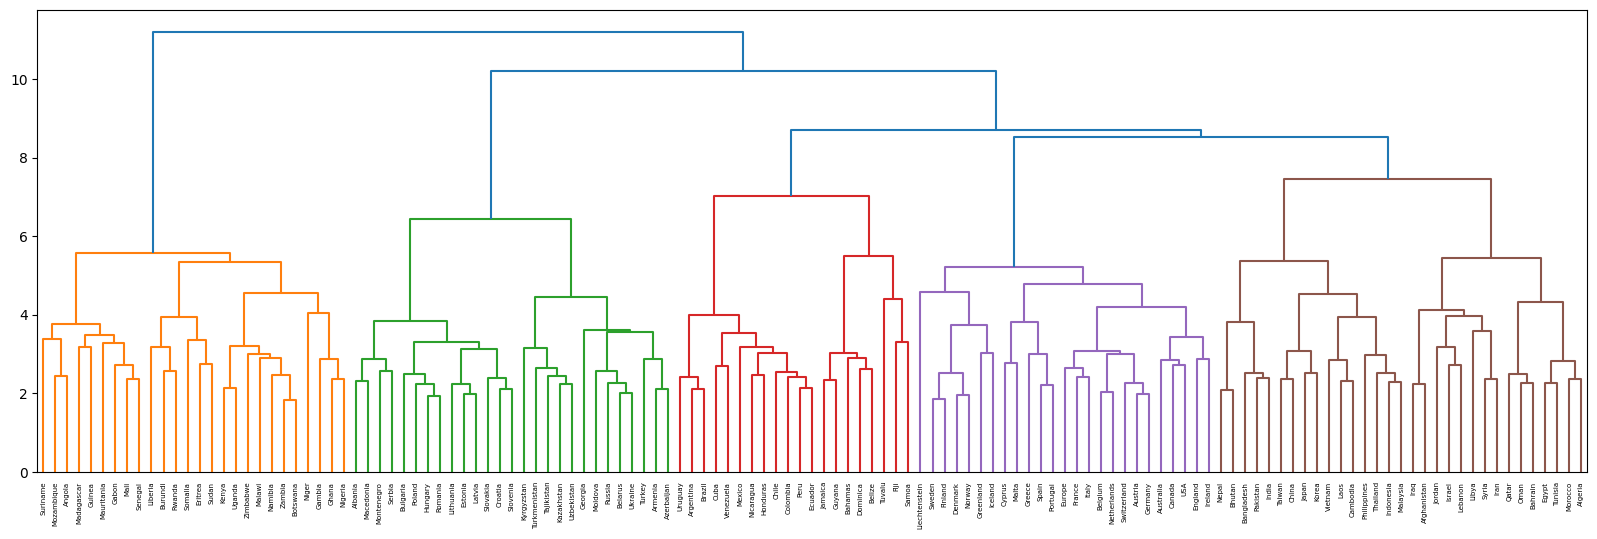

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
#　「分散が小さくなるように近いデータ同士を同じ集合とみなす」を繰り返すことで階層型に。

linkage_result = linkage(countries_vec, method='ward')
plt.figure(figsize=(20, 6))
dendrogram(linkage_result, labels=countries)
plt.savefig('fig68.png')
plt.show()

#69.
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

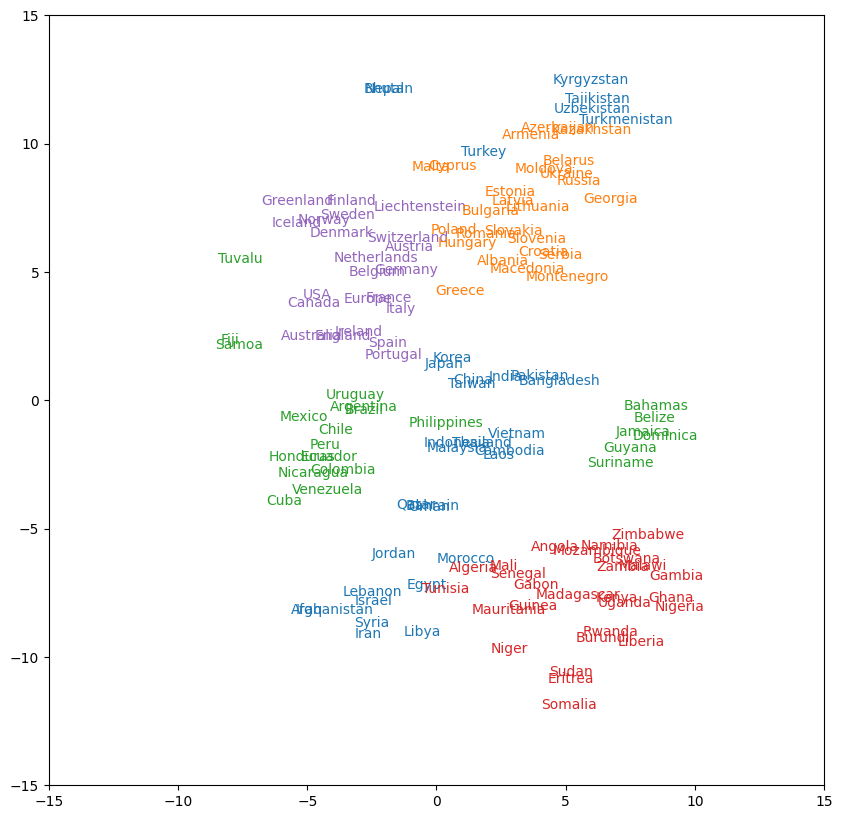

In [ ]:
from sklearn.manifold import TSNE
#多次元ベクトルを二次元に。
tsne = TSNE(n_components=2, random_state=64)
X_reduced = tsne.fit_transform(np.array(countries_vec))
plt.figure(figsize=(10, 10))
for x, country, color in zip(X_reduced, countries, kmeans.labels_):
    plt.text(x[0], x[1], country, color='C{}'.format(color))
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.savefig('fig69.png')
plt.show()